## Importing Required Libraries

In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To give multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


## Loading Dataset

In [374]:
concent_df = pd.read_csv(r"C:\Task\demo_data\2.concerticcir1.csv",header = None)

### Insights of Dataset

In [375]:
concent_df.head()
concent_df.shape
concent_df.info()
concent_df.isna().sum()

,0,1,2
0,-0.382891,-0.090840,1.0
1,-0.020962,-0.477874,1.0
2,-0.396116,-1.289427,0.0
3,-0.618130,-0.063837,1.0
4,0.703478,-0.187038,1.0


(100, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB


0    0
1    0
2    0
dtype: int64

### Plotting Scatterplot to visualize the input and output

In [376]:
# for HD visualizations
%config InlineBackend.figure_format='retina'

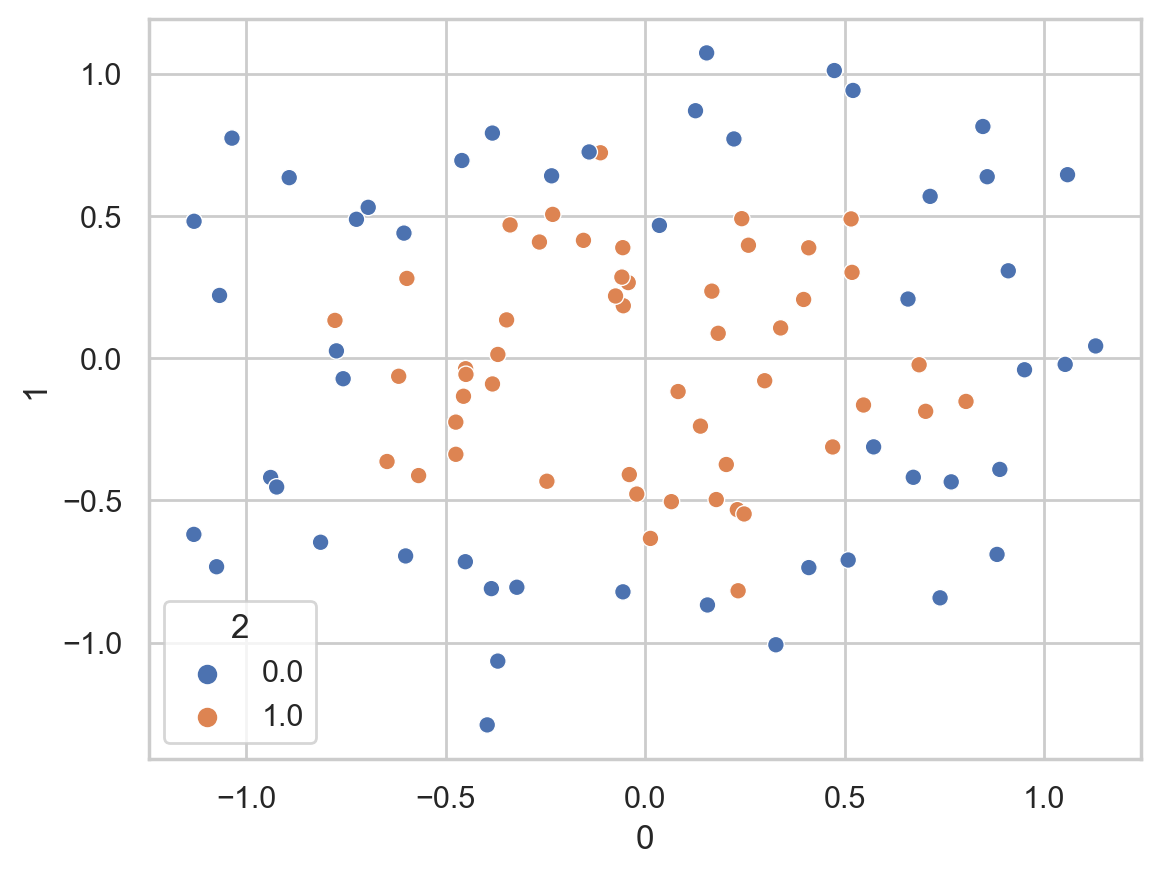

In [377]:
sns.set(style='whitegrid')
sns.scatterplot(x = concent_df[0],y = concent_df[1] ,hue = concent_df[2],data = concent_df);

### Train & test Split of the dataset

In [378]:
from sklearn.model_selection import train_test_split

In [379]:
X_train,X_test,y_train,y_test = train_test_split(concent_df[[0,1]], concent_df[2], test_size = 0.2,random_state = 7)

In [380]:
from sklearn.preprocessing import StandardScaler

In [381]:
# Performing standardization 
scaler = StandardScaler()
X_trainf = scaler.fit_transform(X_train)
X_testf = scaler.transform(X_test)

## Building Model 

## 1st Round

In [382]:
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [383]:
model = Sequential()
model.add(Dense(3,activation = 'relu',kernel_initializer = 'he_normal',input_dim = 2)) # No.of Neurons
model.add(Dense(2,activation = 'relu',kernel_initializer= 'he_normal'))
model.add(Dense(1,activation = 'sigmoid'))

In [384]:
model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_152 (Dense)           (None, 3)                 9         
                                                                 
 dense_153 (Dense)           (None, 2)                 8         
                                                                 
 dense_154 (Dense)           (None, 1)                 3         
                                                                 
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


### Model Compilation and Training 

In [385]:
model.compile(optimizer ='Adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [386]:
history = model.fit(X_trainf,y_train,batch_size = 10,epochs=183,validation_split=0.2)

Epoch 1/183


C:\Users\prave\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


7/7 [==============================] - 1s 54ms/step - loss: 0.6602 - accuracy: 0.5625 - val_loss: 0.7304 - val_accuracy: 0.3125
Epoch 2/183
7/7 [==============================] - 0s 13ms/step - loss: 0.6563 - accuracy: 0.4844 - val_loss: 0.7223 - val_accuracy: 0.3125
Epoch 3/183
7/7 [==============================] - 0s 13ms/step - loss: 0.6519 - accuracy: 0.4844 - val_loss: 0.7164 - val_accuracy: 0.3125
Epoch 4/183
7/7 [==============================] - 0s 14ms/step - loss: 0.6495 - accuracy: 0.5000 - val_loss: 0.7105 - val_accuracy: 0.2500
Epoch 5/183
7/7 [==============================] - 0s 12ms/step - loss: 0.6474 - accuracy: 0.5156 - val_loss: 0.7050 - val_accuracy: 0.2500
Epoch 6/183
7/7 [==============================] - 0s 13ms/step - loss: 0.6449 - accuracy: 0.5312 - val_loss: 0.7010 - val_accuracy: 0.2500
Epoch 7/183
7/7 [==============================] - 0s 15ms/step - loss: 0.6429 - accuracy: 0.5312 - val_loss: 0.6980 - val_accuracy: 0.2500
Epoch 8/183
7/7 [===============

### Evaluation of Model

In [387]:
y_pred = model.predict(X_testf) 

1/1 [==============================] - 0s 90ms/step


In [388]:
y_capf = np.where(y_pred>0.5,1,0)

In [389]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_capf)

0.65

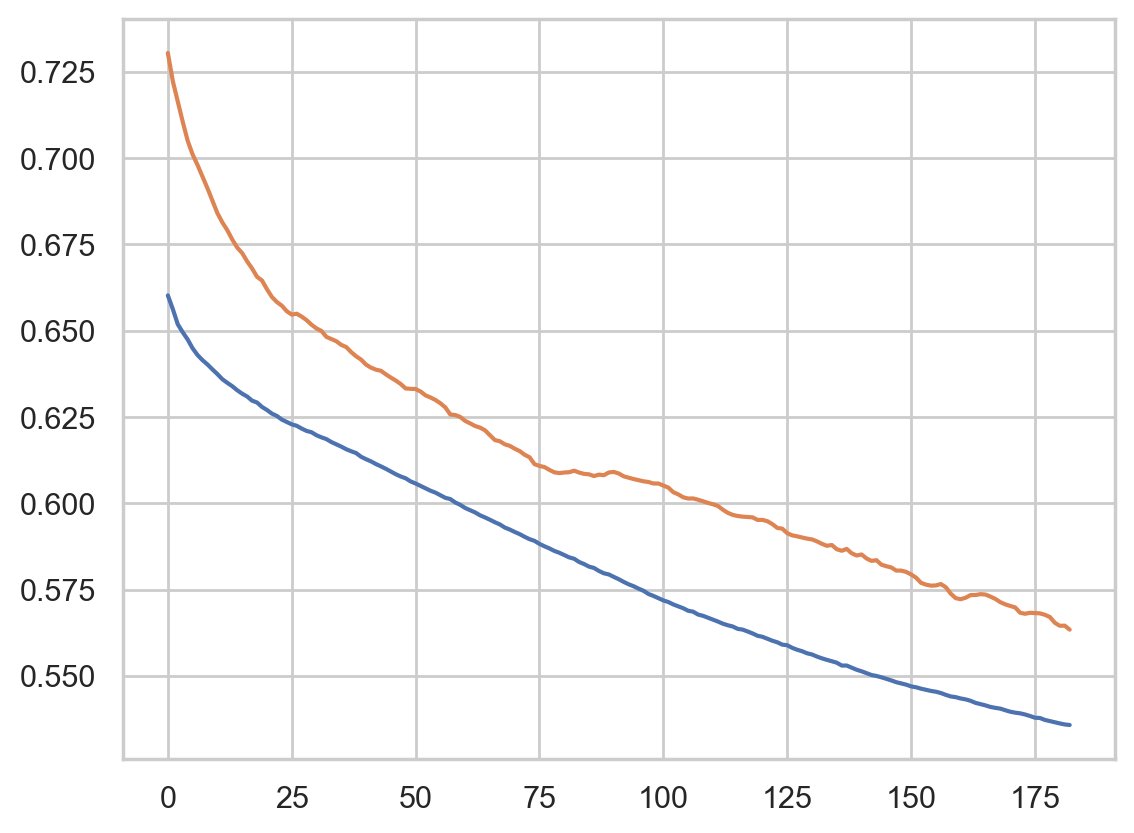

In [390]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

### Plotting Decision Regions

In [391]:
from mlxtend.plotting import plot_decision_regions

9600/9600 [==============================] - 30s 3ms/step


<AxesSubplot: >

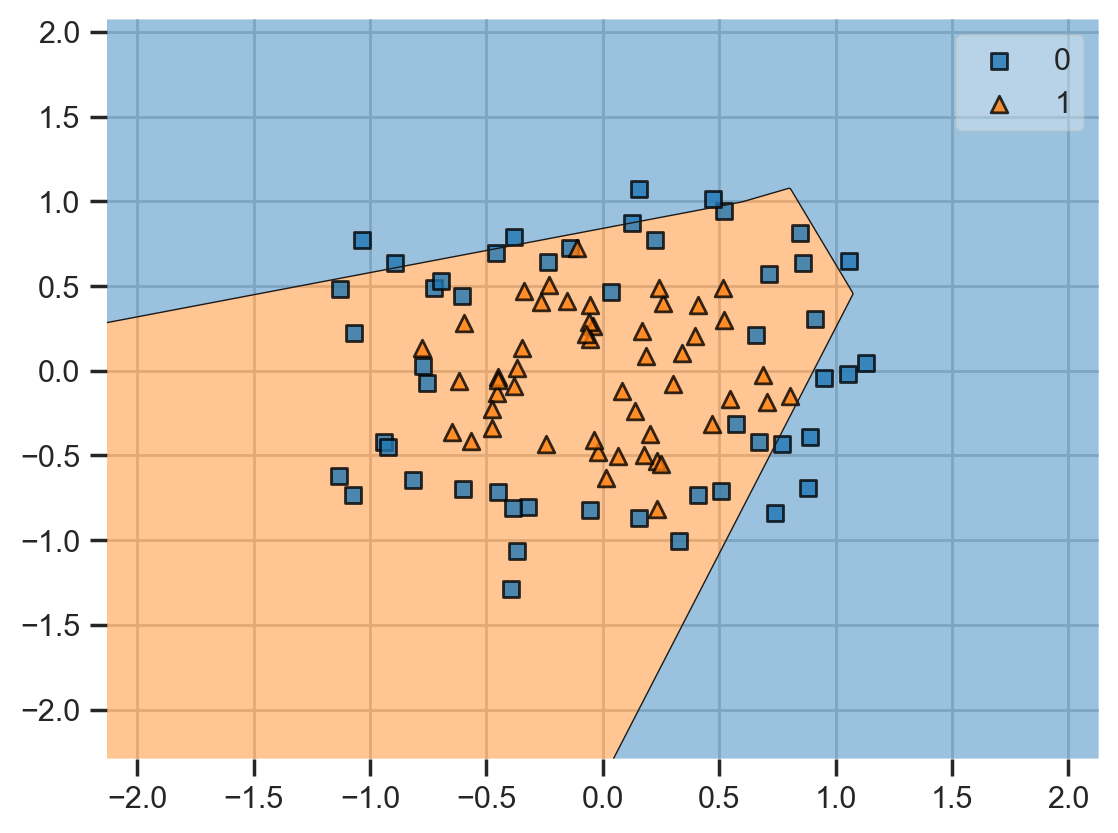

In [392]:
plot_decision_regions(concent_df[[0,1]].values, concent_df[2].values.astype(int), clf = model)

## 2nd Round

In [407]:
model = Sequential()
model.add(Dense(4,activation = 'relu',kernel_initializer = 'glorot_uniform',input_dim = 2)) # No.of Neurons
model.add(Dense(3,activation = 'relu'))
model.add(Dense(2,activation = 'relu'))

model.add(Dense(1,activation = 'sigmoid'))

In [408]:
model.summary()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_161 (Dense)           (None, 4)                 12        
                                                                 
 dense_162 (Dense)           (None, 3)                 15        
                                                                 
 dense_163 (Dense)           (None, 2)                 8         
                                                                 
 dense_164 (Dense)           (None, 1)                 3         
                                                                 
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


### Model Compilation and Training 

In [409]:
model.compile(optimizer ='Adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [410]:
history = model.fit(X_trainf,y_train,batch_size=9,epochs=111,validation_split=0.2)

Epoch 1/111
8/8 [==============================] - 3s 272ms/step - loss: 0.6816 - accuracy: 0.5312 - val_loss: 0.6856 - val_accuracy: 0.4375
Epoch 2/111
8/8 [==============================] - 0s 10ms/step - loss: 0.6809 - accuracy: 0.5469 - val_loss: 0.6851 - val_accuracy: 0.4375
Epoch 3/111
8/8 [==============================] - 0s 11ms/step - loss: 0.6803 - accuracy: 0.5469 - val_loss: 0.6851 - val_accuracy: 0.4375
Epoch 4/111
8/8 [==============================] - 0s 13ms/step - loss: 0.6793 - accuracy: 0.5312 - val_loss: 0.6852 - val_accuracy: 0.4375
Epoch 5/111
8/8 [==============================] - 0s 12ms/step - loss: 0.6784 - accuracy: 0.5312 - val_loss: 0.6854 - val_accuracy: 0.4375
Epoch 6/111
8/8 [==============================] - 0s 11ms/step - loss: 0.6778 - accuracy: 0.5312 - val_loss: 0.6857 - val_accuracy: 0.4375
Epoch 7/111
8/8 [==============================] - 0s 10ms/step - loss: 0.6773 - accuracy: 0.5312 - val_loss: 0.6860 - val_accuracy: 0.4375
Epoch 8/111
8/8 [==

### Evaluation of Model

In [411]:
y_pred = model.predict(X_testf) 

1/1 [==============================] - 0s 101ms/step


In [412]:
y_capf = np.where(y_pred>0.5,1,0)

In [413]:
accuracy_score(y_test,y_capf)

0.5

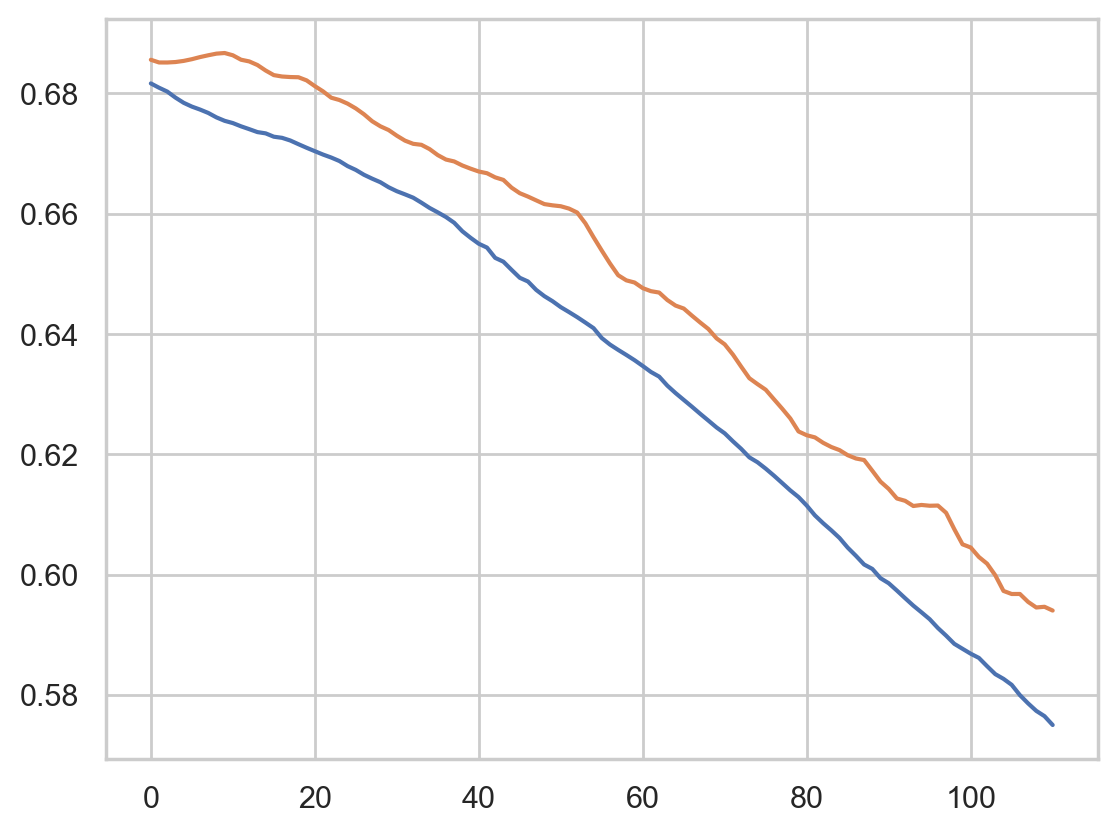

In [414]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

9600/9600 [==============================] - 32s 3ms/step


<AxesSubplot: >

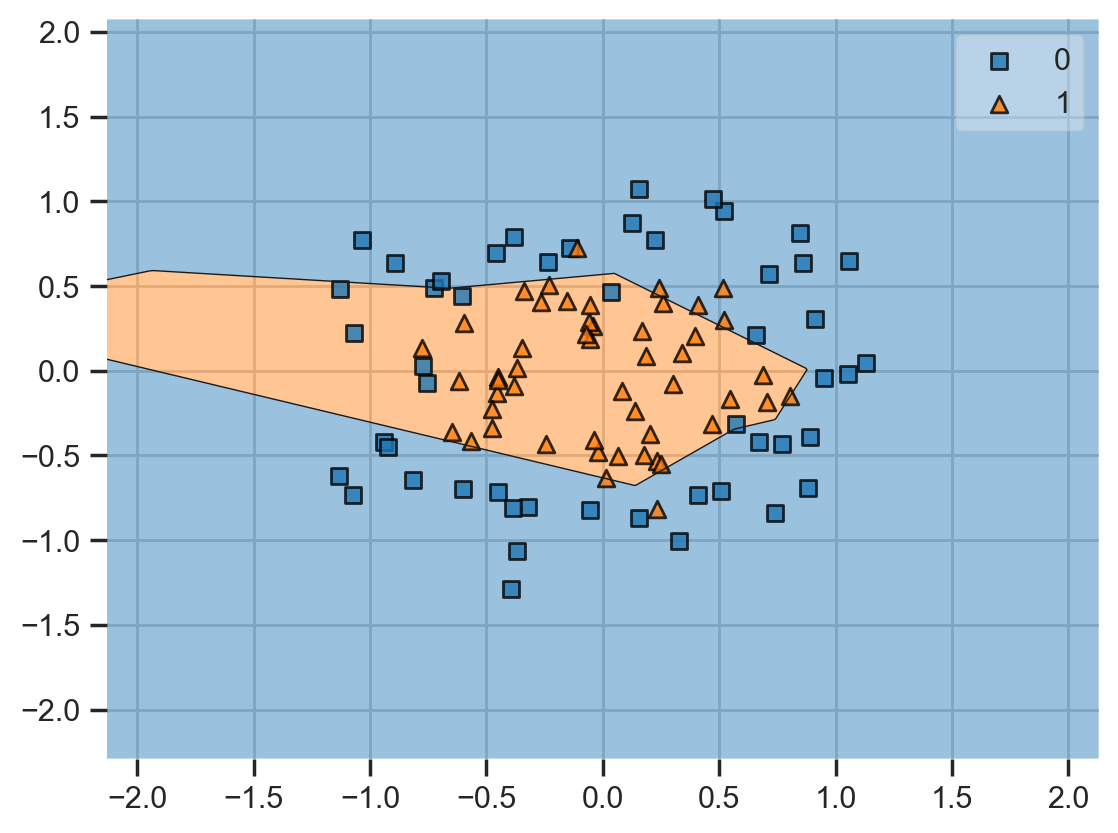

In [415]:
plot_decision_regions(concent_df[[0,1]].values, concent_df[2].values.astype(int), clf = model)

## 3rd Round

In [416]:
model = Sequential()
model.add(Dense(8,activation = 'relu',kernel_initializer = 'random_normal',input_dim = 2)) # No.of Neurons
model.add(Dense(4,activation = 'relu'))
model.add(Dense(3,activation = 'relu'))
model.add(Dense(2,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [417]:
model.summary()

Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_165 (Dense)           (None, 8)                 24        
                                                                 
 dense_166 (Dense)           (None, 4)                 36        
                                                                 
 dense_167 (Dense)           (None, 3)                 15        
                                                                 
 dense_168 (Dense)           (None, 2)                 8         
                                                                 
 dense_169 (Dense)           (None, 1)                 3         
                                                                 
Total params: 86
Trainable params: 86
Non-trainable params: 0
_________________________________________________________________


### Model compilation and training

In [418]:
model.compile(optimizer ='Adam',loss ='binary_crossentropy',metrics=['accuracy'])

In [419]:
history = model.fit(X_trainf,y_train,batch_size=8,epochs=264,validation_split=0.2)

Epoch 1/264


C:\Users\prave\anaconda3\lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


8/8 [==============================] - 2s 33ms/step - loss: 0.6904 - accuracy: 0.5312 - val_loss: 0.6924 - val_accuracy: 0.4375
Epoch 2/264
8/8 [==============================] - 0s 11ms/step - loss: 0.6893 - accuracy: 0.5312 - val_loss: 0.6925 - val_accuracy: 0.4375
Epoch 3/264
8/8 [==============================] - 0s 11ms/step - loss: 0.6879 - accuracy: 0.5312 - val_loss: 0.6925 - val_accuracy: 0.4375
Epoch 4/264
8/8 [==============================] - 0s 11ms/step - loss: 0.6869 - accuracy: 0.5312 - val_loss: 0.6924 - val_accuracy: 0.4375
Epoch 5/264
8/8 [==============================] - 0s 10ms/step - loss: 0.6859 - accuracy: 0.5312 - val_loss: 0.6923 - val_accuracy: 0.4375
Epoch 6/264
8/8 [==============================] - 0s 11ms/step - loss: 0.6844 - accuracy: 0.5312 - val_loss: 0.6920 - val_accuracy: 0.4375
Epoch 7/264
8/8 [==============================] - 0s 11ms/step - loss: 0.6827 - accuracy: 0.5312 - val_loss: 0.6912 - val_accuracy: 0.4375
Epoch 8/264
8/8 [===============

### Evaluation of Model

In [420]:
y_pred = model.predict(X_testf) 

1/1 [==============================] - 0s 113ms/step


In [421]:
y_capf = np.where(y_pred>0.5,1,0)

In [422]:
accuracy_score(y_test,y_capf)

0.9

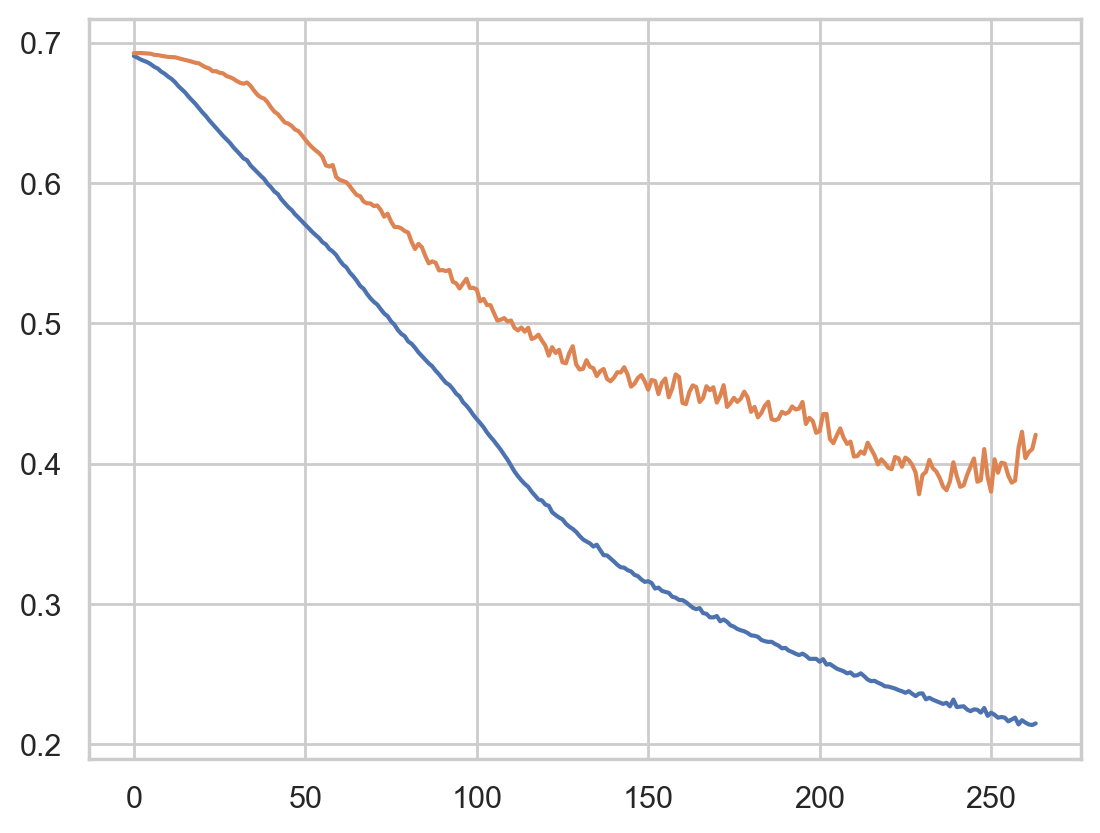

In [423]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

9600/9600 [==============================] - 36s 4ms/step


<AxesSubplot: >

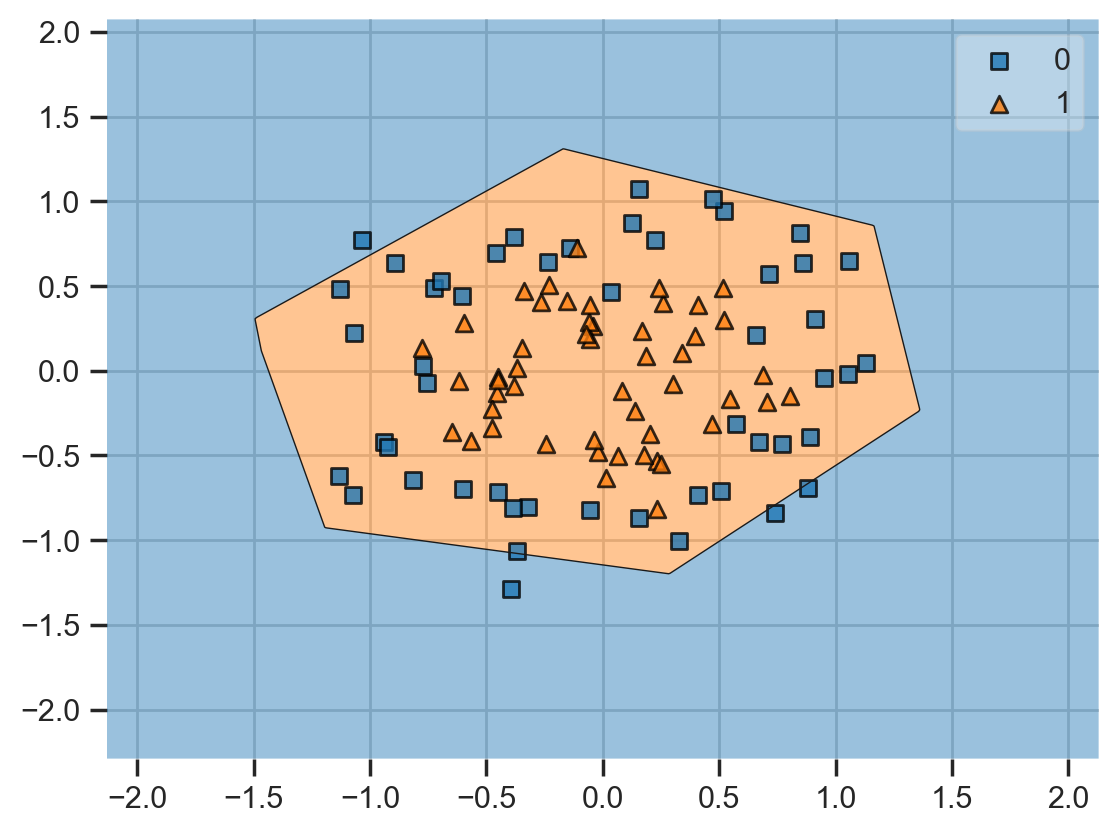

In [424]:
plot_decision_regions(concent_df[[0,1]].values, concent_df[2].values.astype(int), clf = model)